# **1. Perkenalan Dataset**

## **Konteks**

Penyakit kardiovaskular (CVD) merupakan penyebab kematian nomor satu di dunia, merenggut sekitar 17,9 juta jiwa setiap tahun atau setara dengan 31% dari seluruh kematian global. Empat dari lima kematian akibat CVD disebabkan oleh serangan jantung dan stroke, dan sepertiga di antaranya terjadi secara dini pada orang di bawah usia 70 tahun. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD, dan dataset ini berisi 11 fitur yang dapat digunakan untuk memprediksi kemungkinan penyakit jantung.


Orang yang menderita penyakit kardiovaskular atau yang berisiko tinggi terhadapnya (karena memiliki satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada sebelumnya) memerlukan deteksi dan penanganan dini, di mana model pembelajaran mesin dapat sangat membantu.

## Variabel Dataset

Berikut keterangan variabel dalam dataset.

- **Age**: Usia pasien (dalam tahun)  
- **Sex**: Jenis kelamin pasien (`M` untuk laki-laki, `F` untuk perempuan)  
- **ChestPainType**: Jenis nyeri dada  
  - `TA`: Typical Angina 
  - `ATA`: Atypical Angina
  - `NAP`: Non-Anginal Pain
  - `ASY`: Asymptomatic
- **RestingBP**: Tekanan darah saat istirahat (mm Hg)  
- **Cholesterol**: Kadar kolesterol darah (mg/dL)  
- **FastingBS**: Gula darah puasa  
  - `1`: jika > 120 mg/dL  
  - `0`: jika ≤ 120 mg/dL  
- **RestingECG**: Hasil rekam jantung saat istirahat  
  - `Normal`: Tidak ada kelainan  
  - `ST`: Gangguan gelombang ST-T (inversi gelombang T, elevasi/depresi ST > 0.05 mV)  
  - `LVH`: Pembesaran ventrikel kiri (berdasarkan kriteria Estes)  
- **MaxHR**: Detak jantung maksimum yang dicapai (60–202)  
- **ExerciseAngina**: Nyeri dada yang terjadi saat olahraga (`Y` ya, `N` tidak)  
- **Oldpeak**: Tingkat depresi segmen ST akibat olahraga  
- **ST_Slope**: Kemiringan segmen ST saat olahraga  
  - `Up`: Meningkat  
  - `Flat`: Datar  
  - `Down`: Menurun  
- **HeartDisease**: Apakah pasien memiliki penyakit jantung  
  - `1`: Mengidap penyakit jantung  
  - `0`: Normal (tidak memiliki penyakit jantung)

## Sumber

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# Load Dataset
df=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [4]:
# Menampilkan 5 baris pertama
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Memastikan jumlah data dan fitur
df.shape

(918, 12)

In [6]:
# Mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Melihat statistik awal
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
# Cek Missing Value
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [9]:
# Cek data duplikat
df.duplicated().sum()

0

In [10]:
# Cek data unik
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [11]:
# Tampilkan nilai unik dari semua kolom bertipe 'object'
for col in df.select_dtypes(include='object').columns:
    print(f"Kolom: {col}")
    print(df[col].value_counts())
    print("="*40)
    print("\n")

Kolom: Sex
Sex
M    725
F    193
Name: count, dtype: int64


Kolom: ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


Kolom: RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


Kolom: ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


Kolom: ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64




In [12]:
# Kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Kolom kategorikal (object atau string)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Kolom numerik:", numeric_cols)
print("Kolom kategorikal:", categorical_cols)

Kolom numerik: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Kolom kategorikal: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

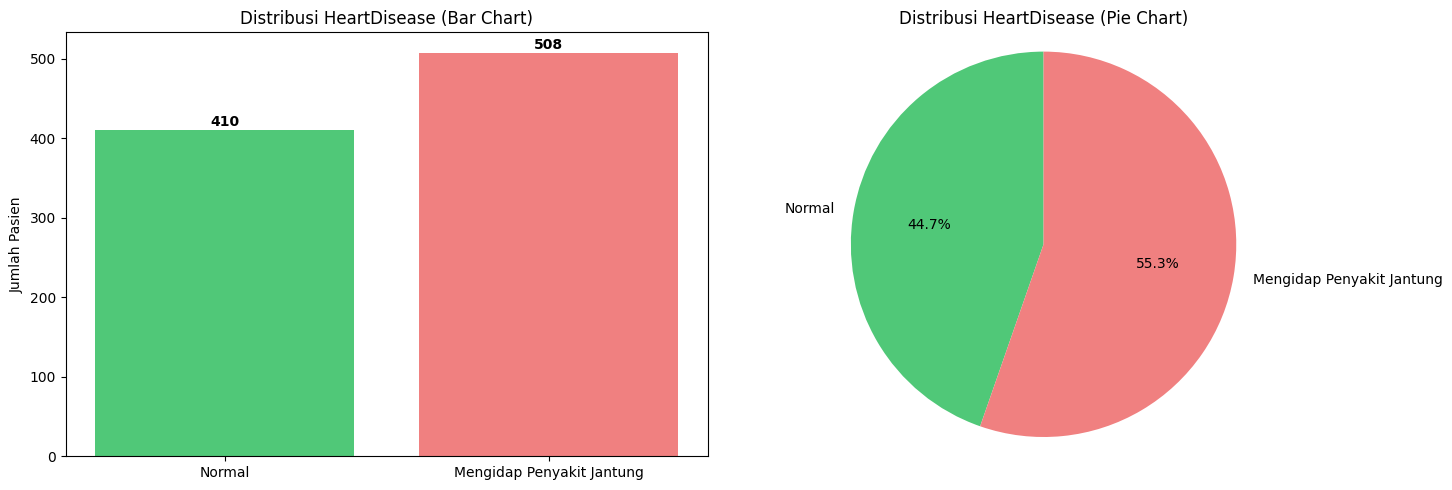

In [13]:
# Visualisasi Distribusi HeartDisease

# Hitung jumlah kategori HeartDisease
heart_counts = df['HeartDisease'].value_counts().sort_index()

# Label & warna (menggunakan nama standar/hex)
labels = ['Normal', 'Mengidap Penyakit Jantung']
colors = ['#50C878', '#F08080'] 

# Subplot berdampingan
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Bar Chart
axs[0].bar(labels, heart_counts, color=colors)
axs[0].set_title('Distribusi HeartDisease (Bar Chart)')
axs[0].set_ylabel('Jumlah Pasien')

for i, count in enumerate(heart_counts):
    axs[0].text(i, count + 5, f'{count}', ha='center', fontsize=10, fontweight='bold')

# Pie Chart
axs[1].pie(heart_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axs[1].set_title('Distribusi HeartDisease (Pie Chart)')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

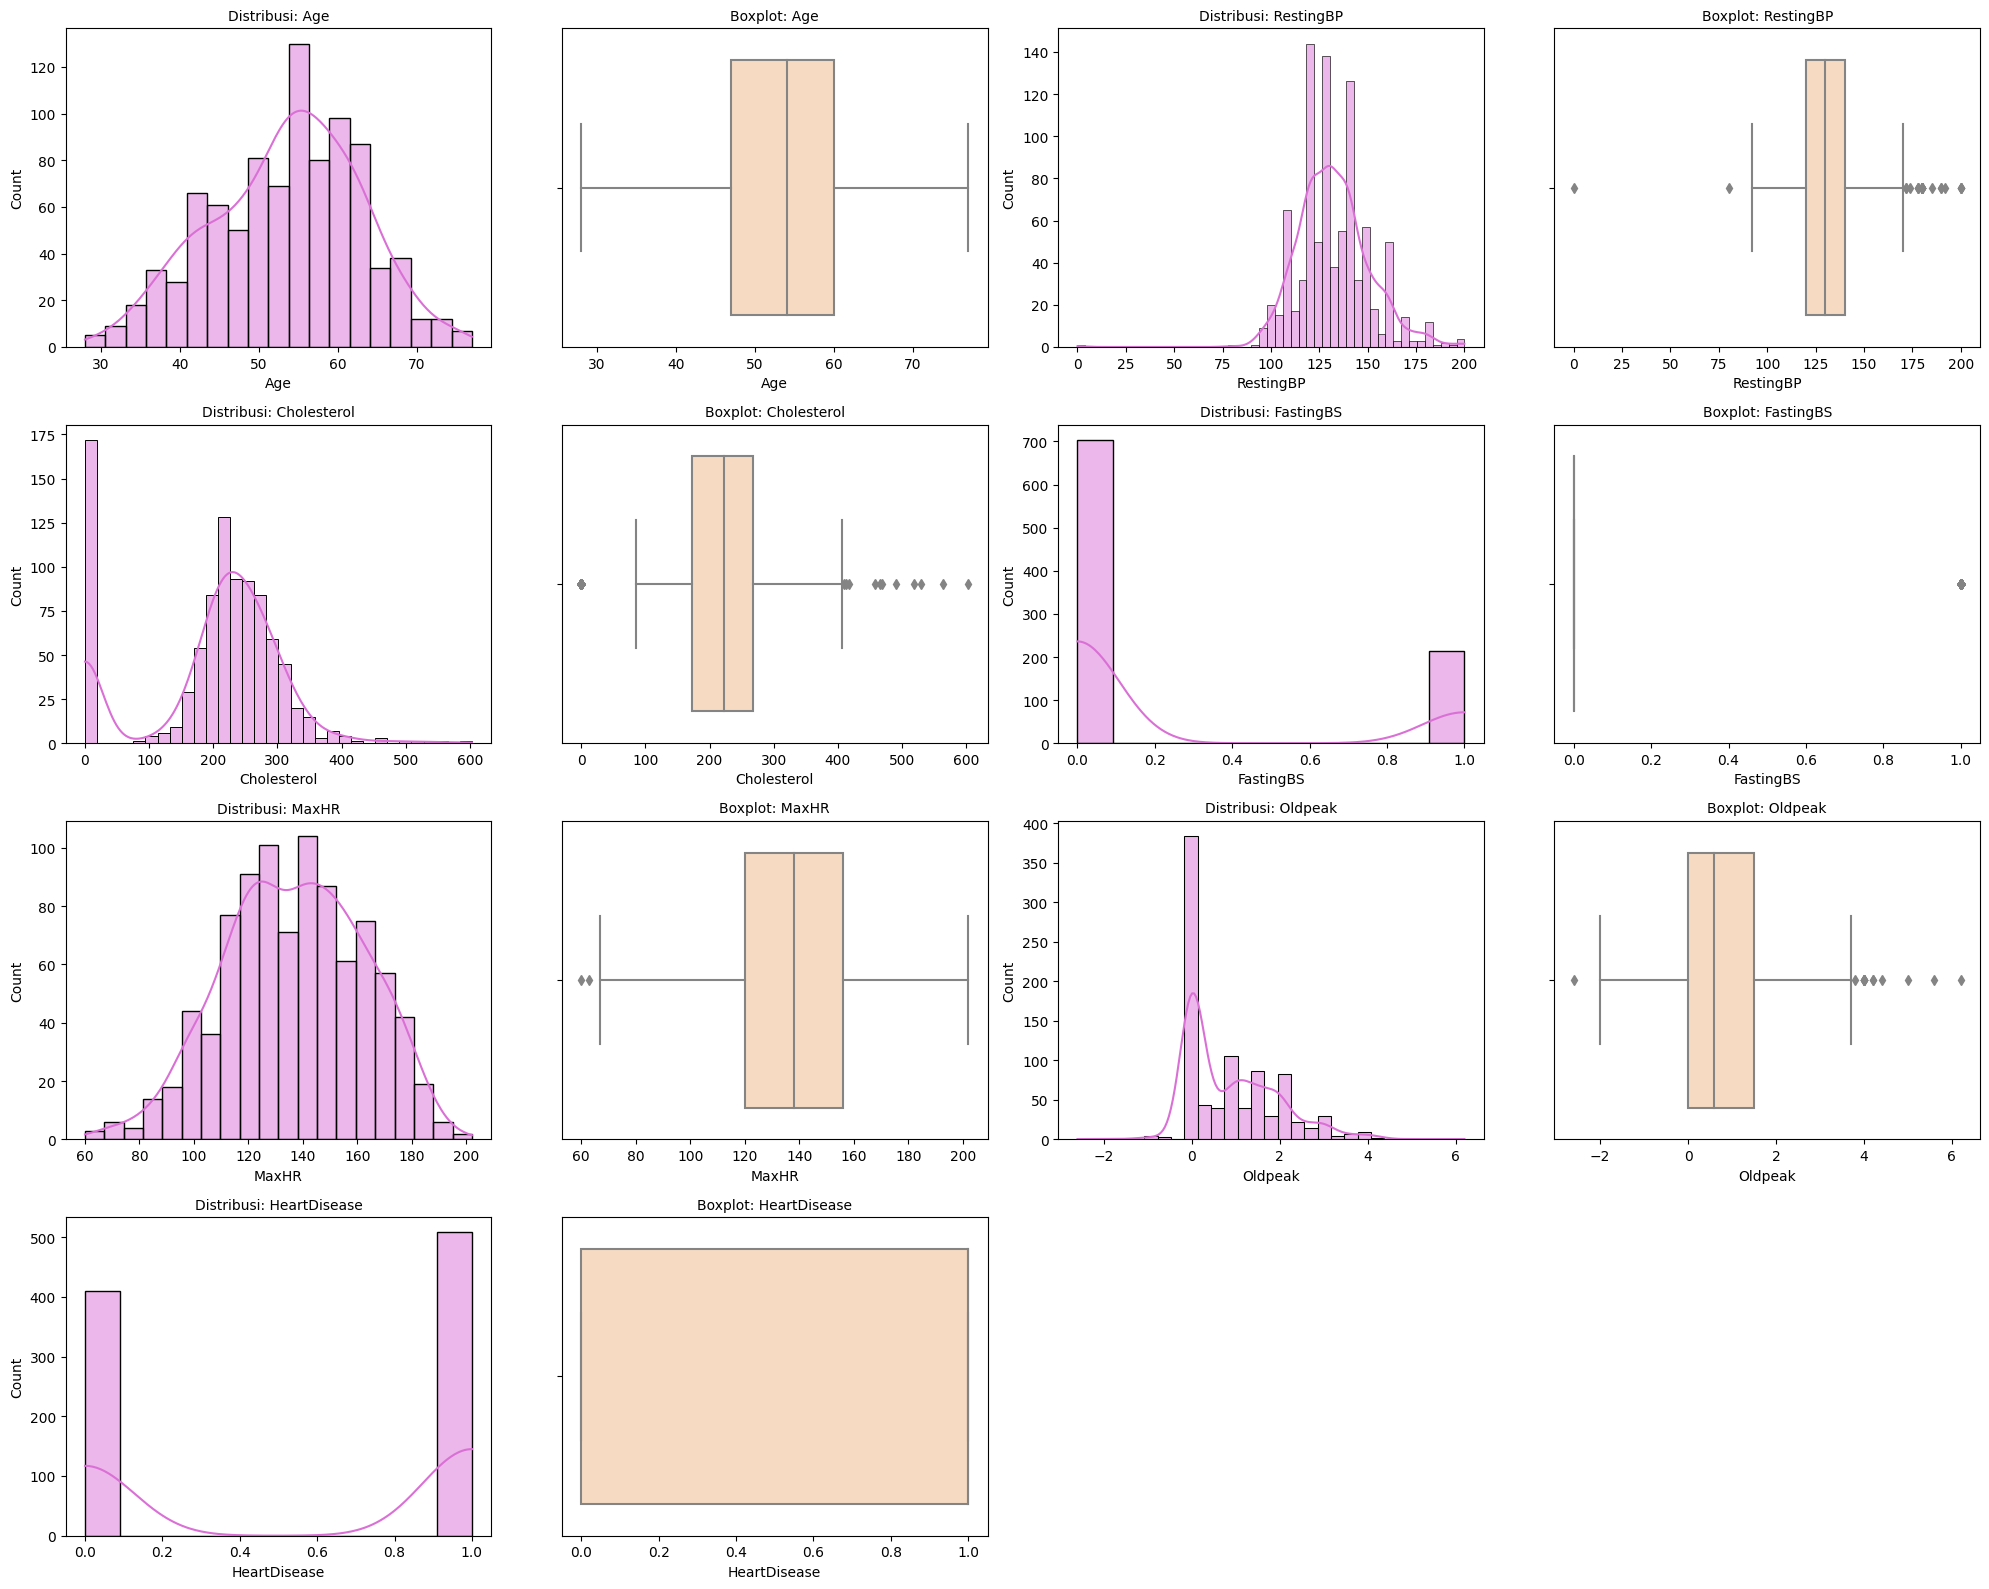

In [14]:
# Univariate Analysis untuk Kolom Numerik

# Plotting
n_features = len(numeric_cols)
n_cols = 2  # 2 kolom fitur per baris
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols * 2, figsize=(20, n_rows * 4))

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = (i % n_cols) * 2  # posisi histogram

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[row, col_pos], color='Orchid')
    axes[row, col_pos].set_title(f'Distribusi: {col}', fontsize=10)
    axes[row, col_pos].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[row, col_pos + 1], color='PeachPuff')
    axes[row, col_pos + 1].set_title(f'Boxplot: {col}', fontsize=10)

# Nonaktifkan subplot kosong jika jumlah fitur ganjil
if n_features % n_cols != 0:
    total_plots = n_rows * n_cols * 2
    for i in range(n_features * 2, total_plots):
        row = i // (n_cols * 2)
        col_pos = i % (n_cols * 2)
        axes[row, col_pos].axis('off')

plt.tight_layout()
plt.show()

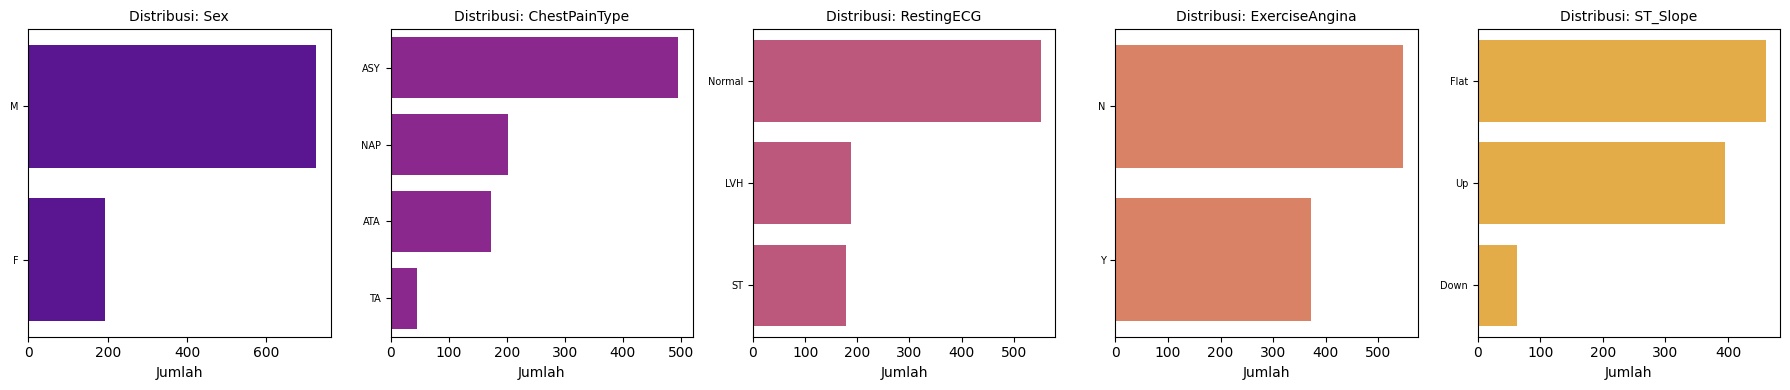

In [15]:
# Univariate Analysis untuk kolom kategorikal

# Hitung jumlah fitur & plot layout
n_features = len(categorical_cols)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

# Siapkan subplot
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Buat palette warna
palette = sns.color_palette("plasma", n_features)

# Plot countplot horizontal untuk tiap kolom kategorikal
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=ax, color=palette[i])
    ax.set_title(f'Distribusi: {col}', fontsize=10)
    ax.set_ylabel('')
    ax.set_xlabel('Jumlah')
    ax.tick_params(axis='y', labelsize=7)

# Sembunyikan subplot kosong jika jumlah fitur tidak pas
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

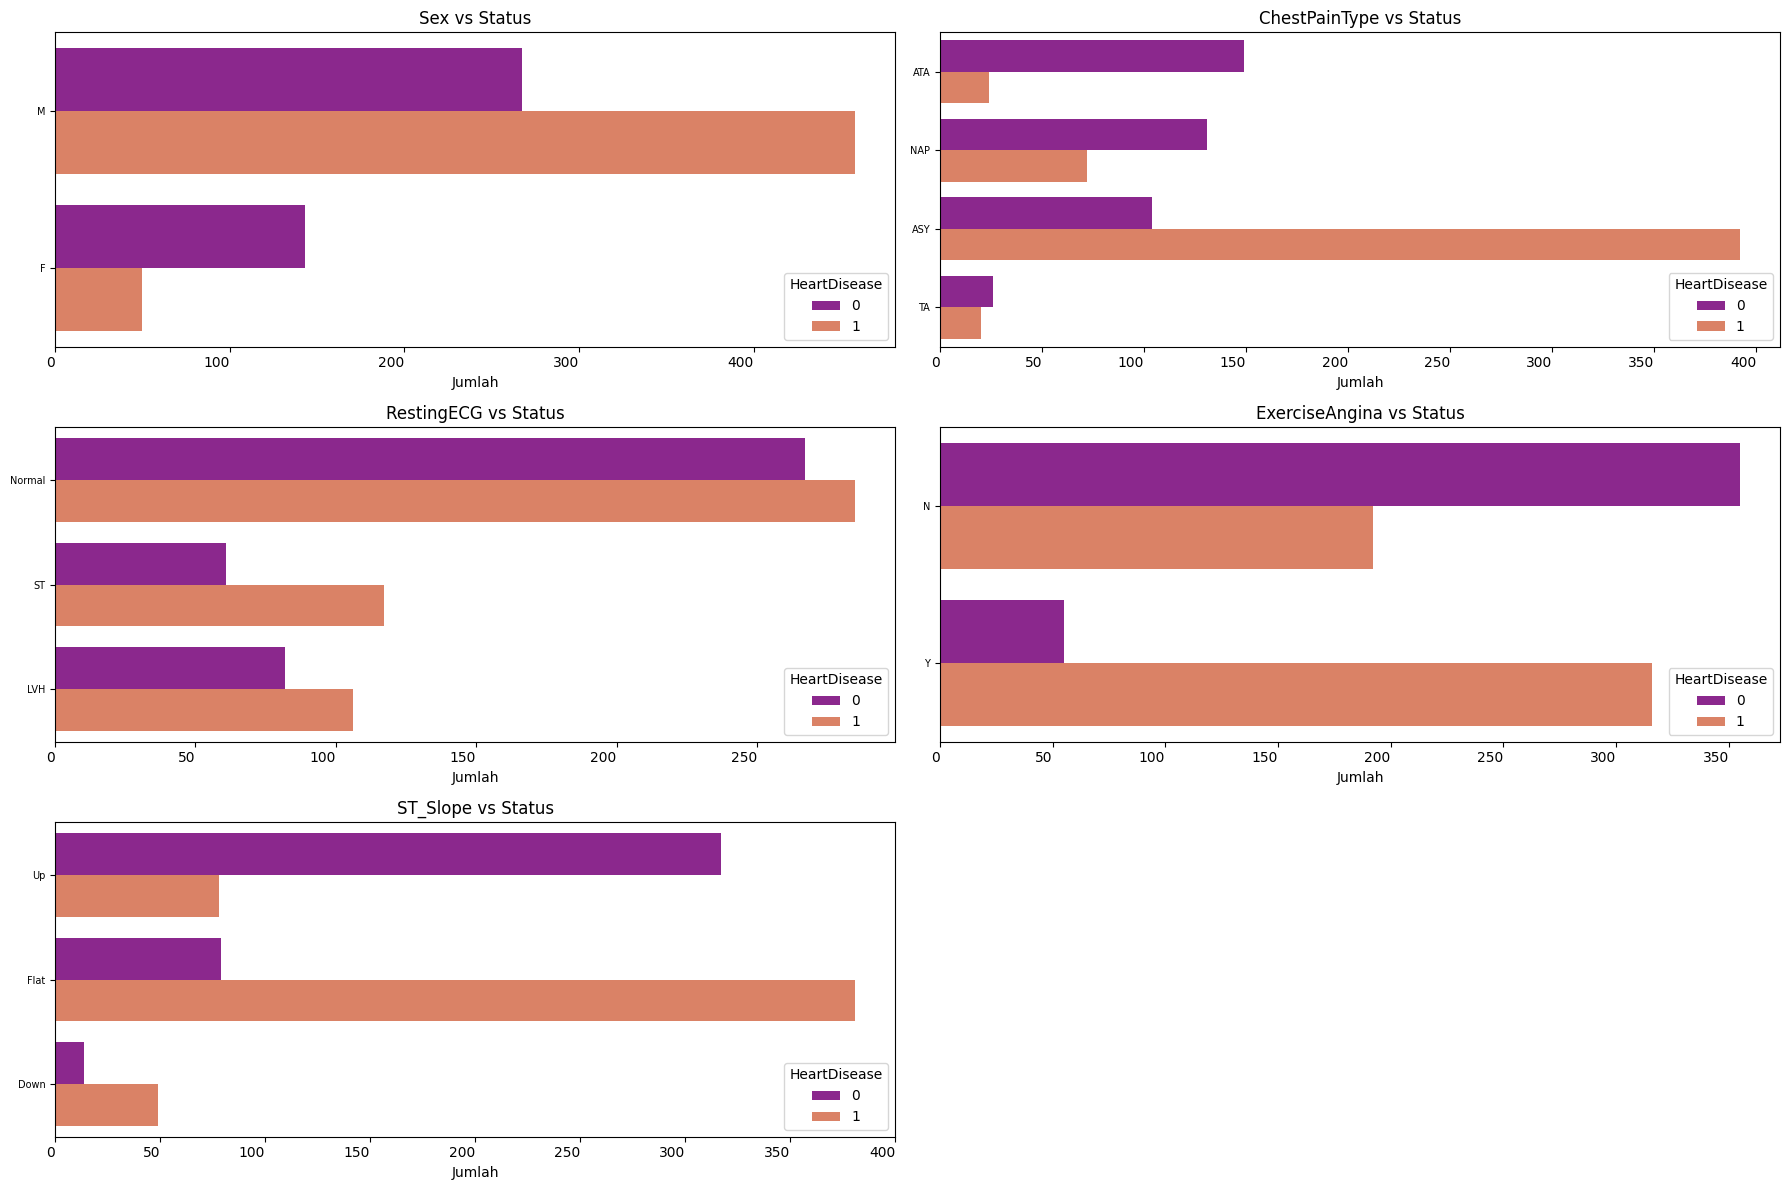

In [16]:
# Multivariate Analysis untuk Kolom Kategorikal

# Plot untuk setiap fitur kategorikal relatif terhadap 'HeartDisease'
n_features = len(categorical_cols)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

# figure dan axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 4))

# iterasi setiap fitur kategorikal
for i, col in enumerate(categorical_cols):
    row = i // n_cols
    col_pos = i % n_cols

    # axis yang akan digunakan
    ax = axes[row, col_pos] if n_rows > 1 else axes[col_pos]

    # countplot
    sns.countplot(y=col, hue='HeartDisease', data=df, palette='plasma', ax=ax)
    ax.set_title(f'{col} vs Status')
    ax.set_ylabel('')
    ax.set_xlabel('Jumlah')
    ax.legend(title='HeartDisease', loc='lower right')
    ax.tick_params(axis='y', labelsize=7)

    # Rotasi
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
    fig.tight_layout()

# Menyembunyikan axes yang tidak digunakan jika jumlah fitur tidak habis dibagi 2
if n_features % n_cols != 0:
    for j in range(n_features % n_cols, n_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

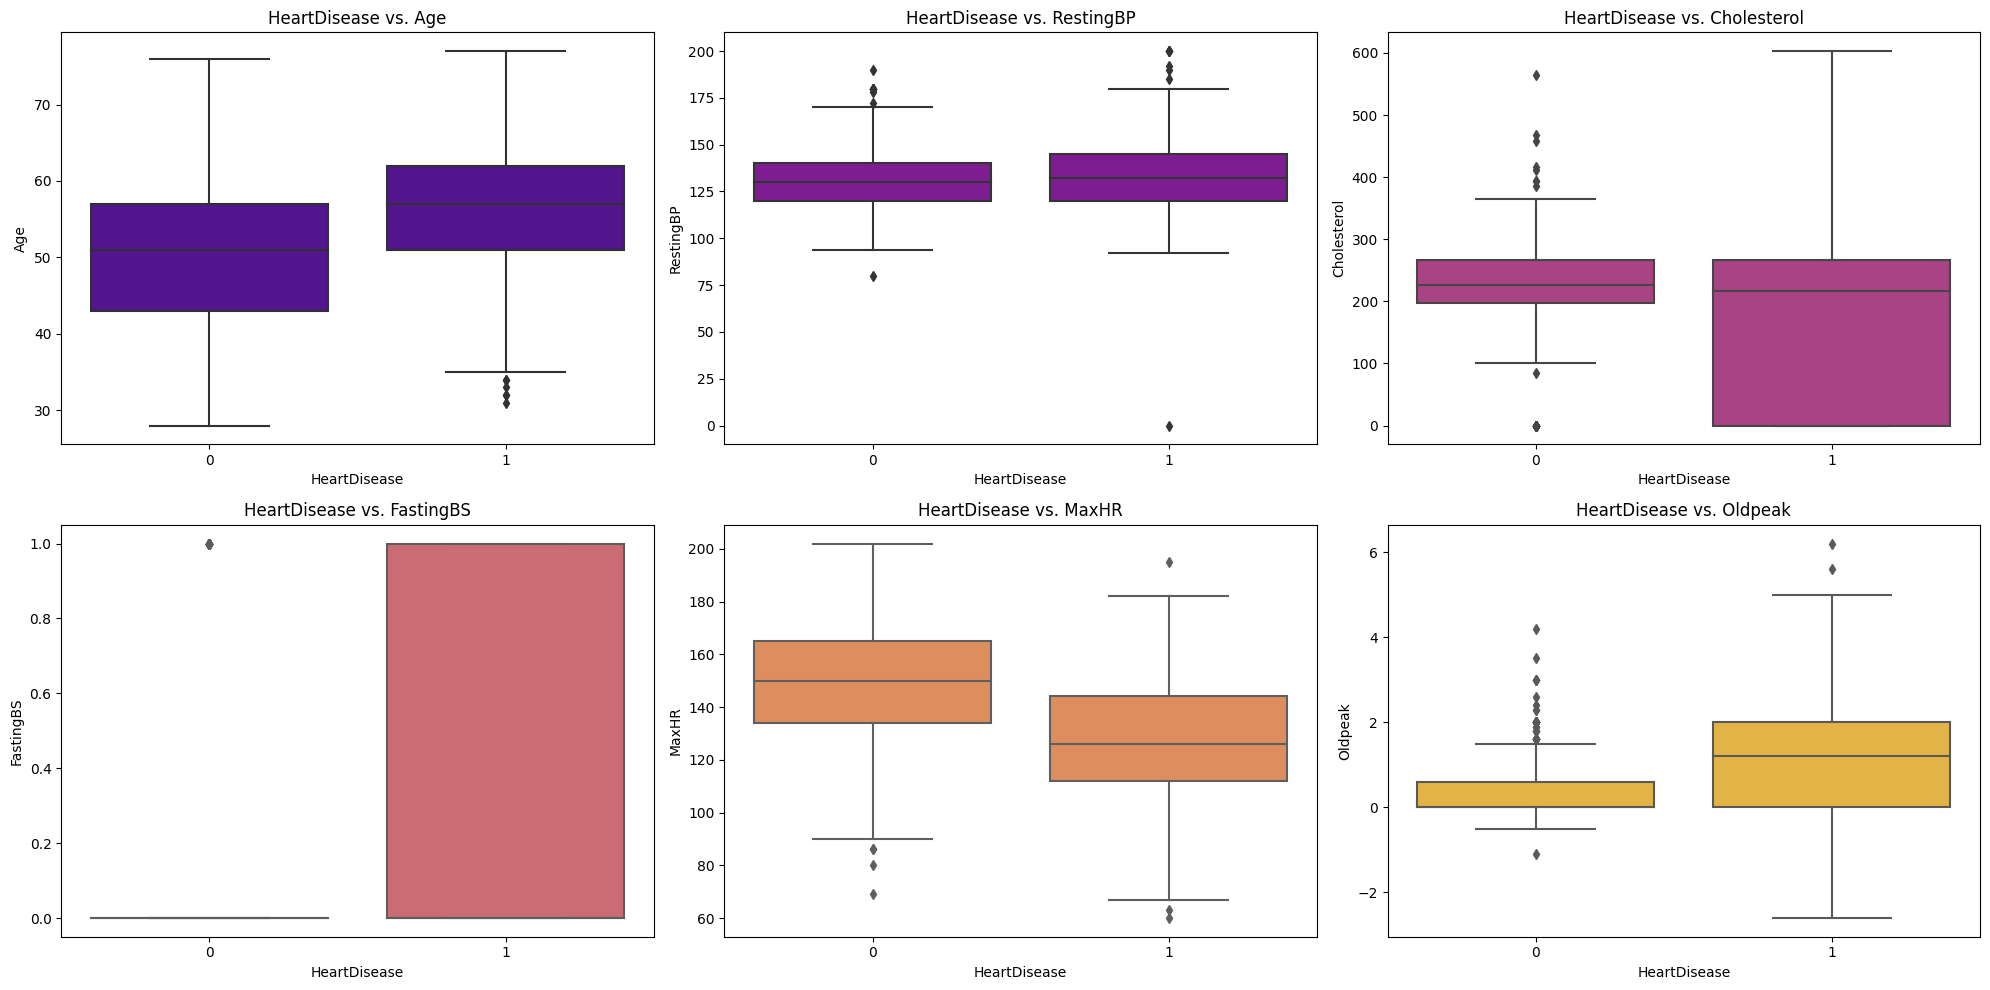

In [17]:
# Multivariate Analysis untuk Kolom Numerik

# Keluarkan 'HeartDisease' dari numeric_cols jika ada
numeric_plot_cols = [col for col in numeric_cols if col != 'HeartDisease']

# Hitung jumlah baris dan kolom untuk subplot
n_features = len(numeric_plot_cols)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Buat subplot
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Buat palette warna
palette = sns.color_palette("plasma", n_features)

# Visualisasi setiap kolom numerik terhadap HeartDisease
for i, col in enumerate(numeric_plot_cols):
    if i < len(axes):
        sns.boxplot(x='HeartDisease', y=col, data=df, ax=axes[i], color=palette[i])
        axes[i].set_title(f'HeartDisease vs. {col}')

# Sembunyikan subplot yang tidak terpakai
for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

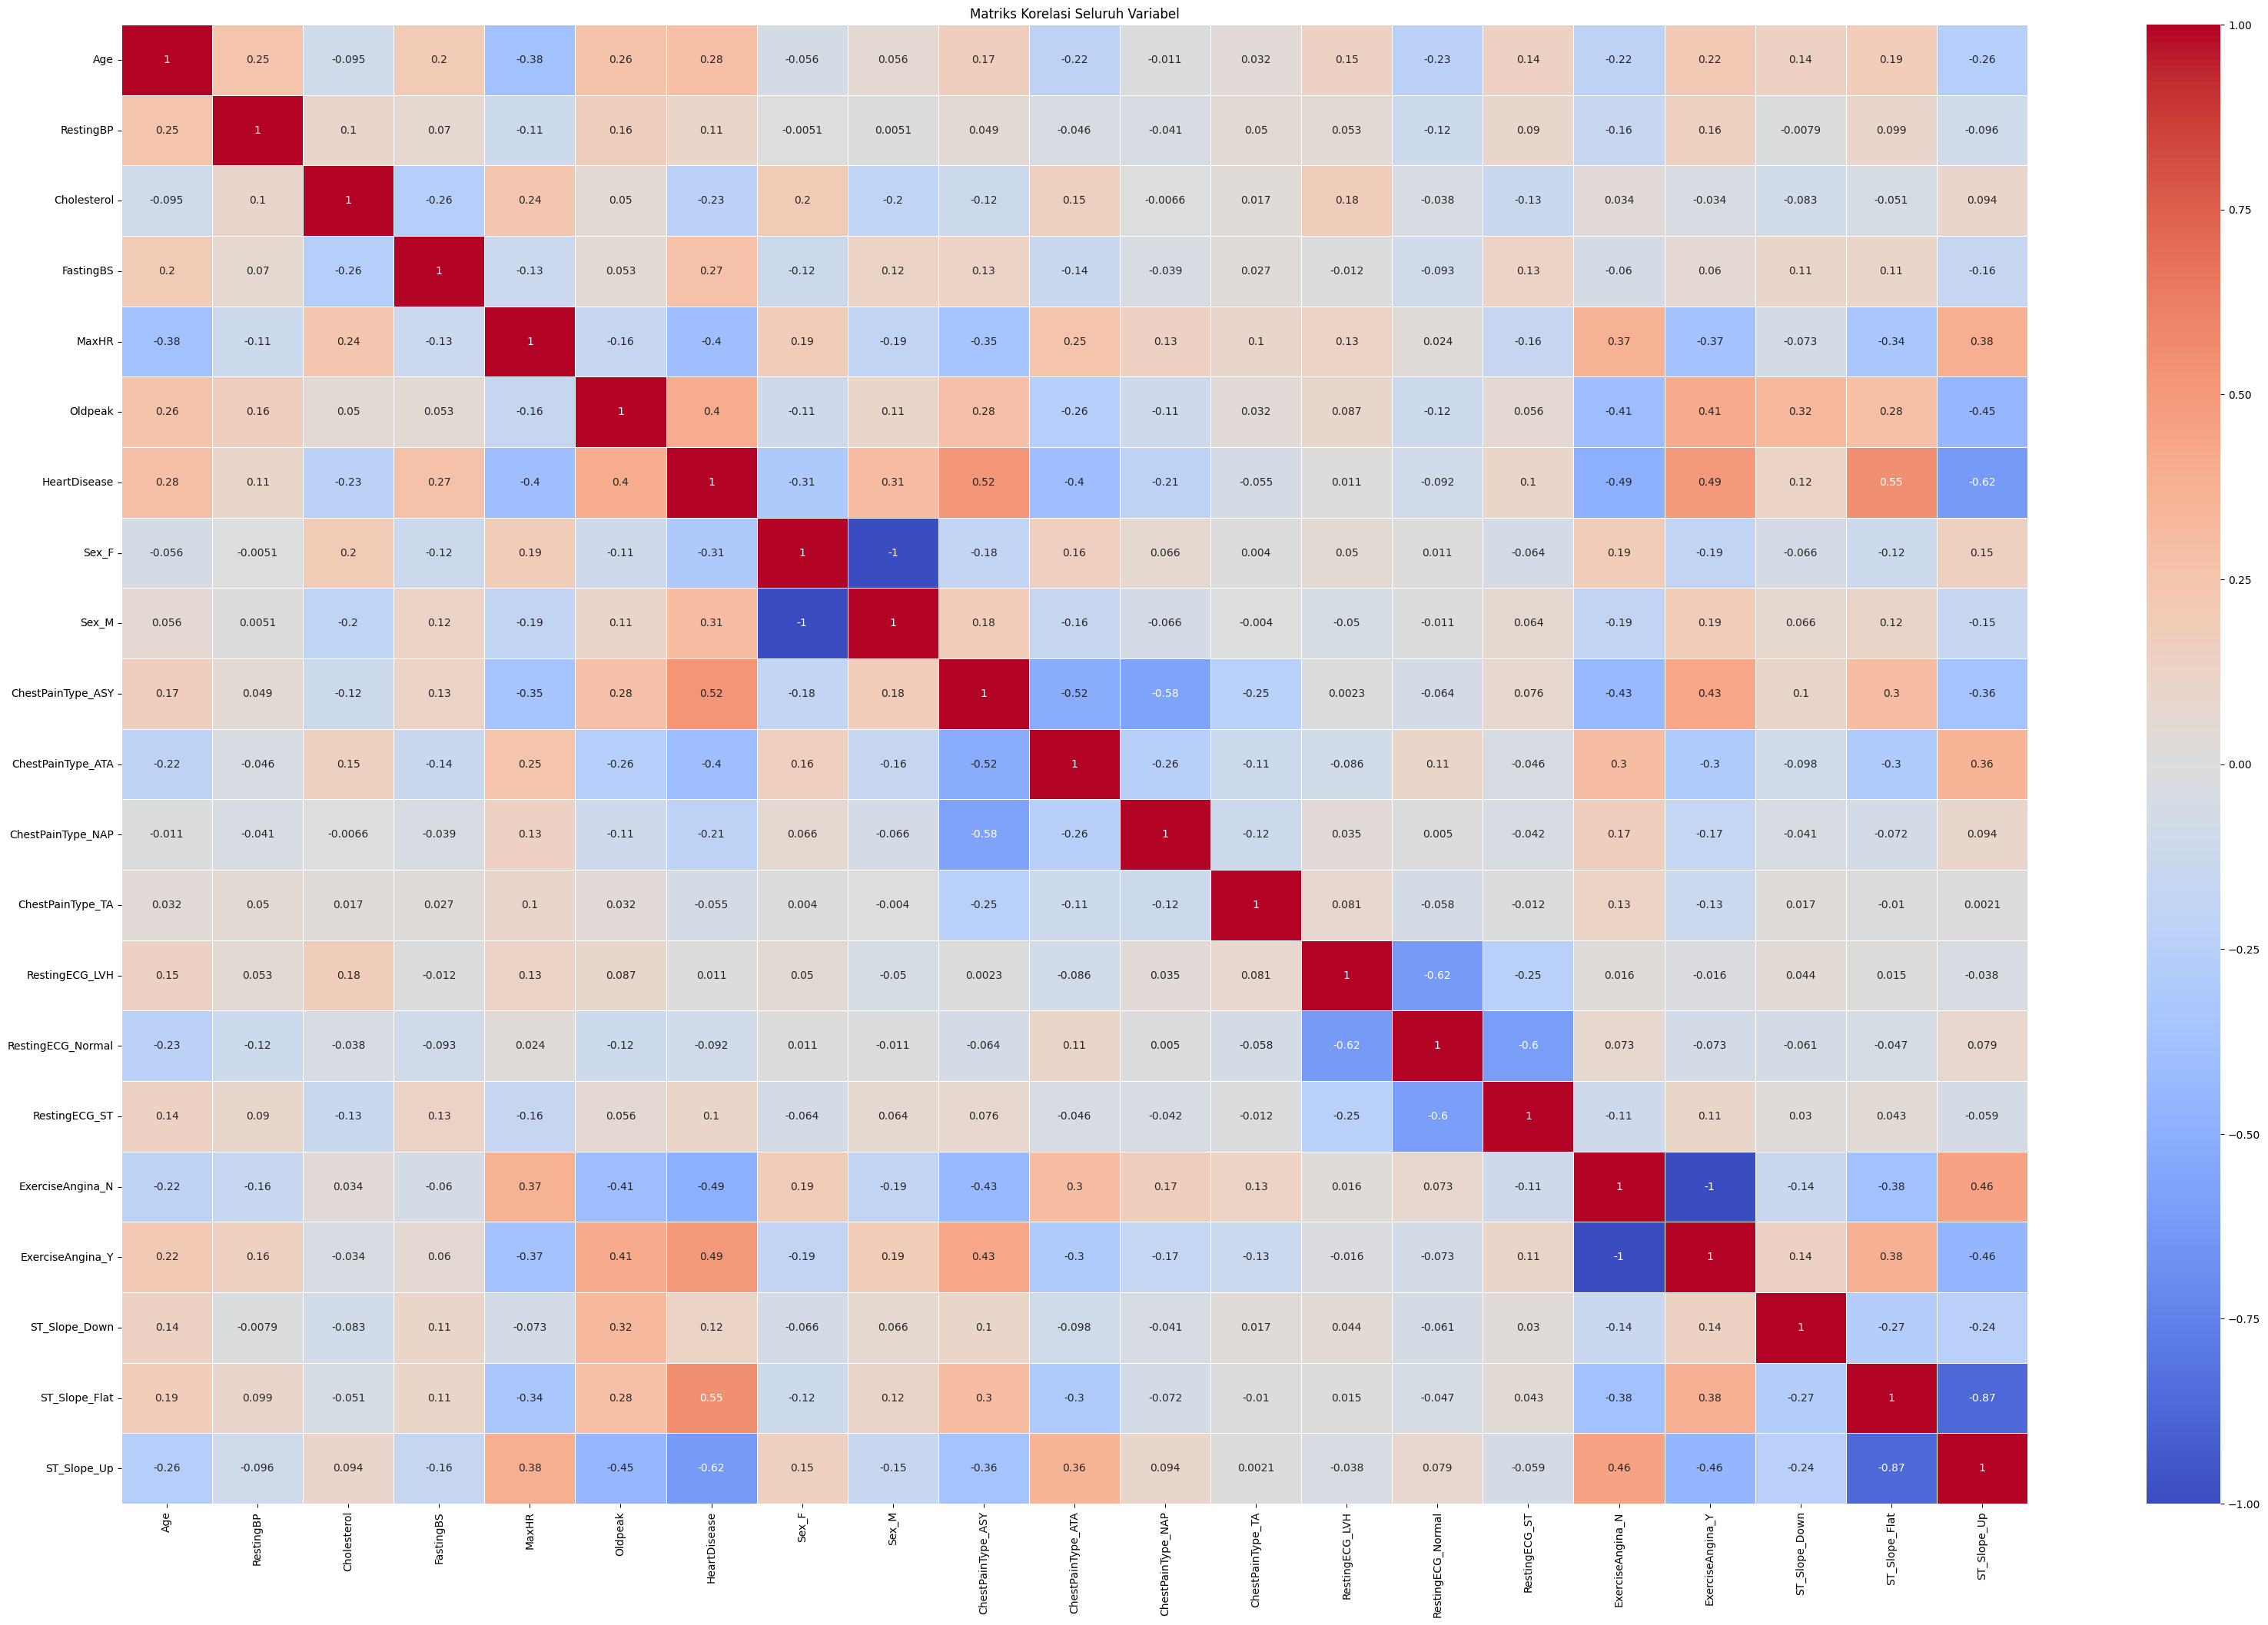

In [18]:
# Correlation matrix
corr_categorical_cols = list(df.select_dtypes(include=['object']).columns)
# One-hot encoding fitur kategorikal
df_encoded = pd.get_dummies(df, columns=corr_categorical_cols, drop_first=False)

# Matriks korelasi seluruh fitur
correlation_matrix = df_encoded.corr()

# Plot matriks korelasi
plt.figure(figsize=(40, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Seluruh Variabel')
plt.show()

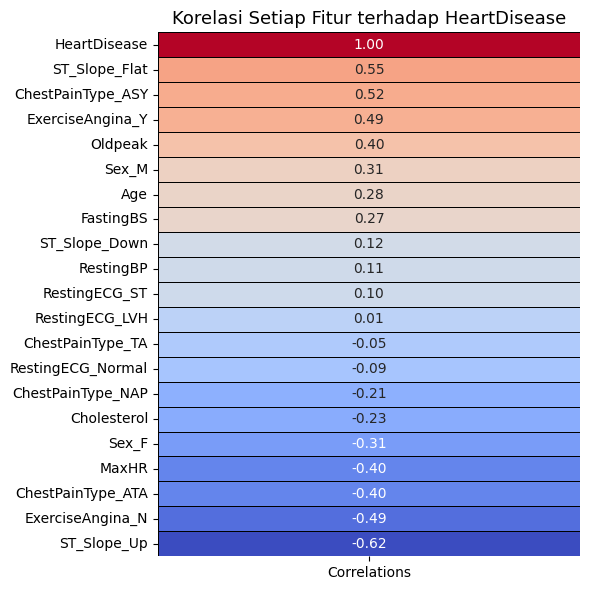

In [19]:
# Hitung korelasi terhadap target 'HeartDisease'
corr = df_encoded.corrwith(df_encoded['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Plot heatmap korelasi
plt.figure(figsize=(6, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',         # Palet warna yang jelas (bisa diganti sesuai selera)
    linewidths=0.5,
    linecolor='black',
    cbar=False,
    fmt=".2f"
)
plt.title('Korelasi Setiap Fitur terhadap HeartDisease', fontsize=13)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

In [20]:
# Copy data untuk preprocessing 
df_processed = df.copy()

### Menghapus atau Menangani Data Kosong (Missing Values)

Berdasarkan hasil pengecekan, dataset tidak mengandung missing values, sehingga tahap imputasi atau penanganan data hilang tidak diperlukan dalam proses pra-pemrosesan ini.

### Menghapus Data Duplikat

Berdasarkan hasil pengecekan, dataset tidak mengandung duplikat, sehingga tahap penanganan data duplikat tidak diperlukan dalam proses pra-pemrosesan ini.

### Menangani Anomali Data

Pada data terdapat nilai 0 pada variabel RestingBP dan Cholesterol. Berikut beberapa penjelasan jika RestingBP (tekanan darah istirahat) dan Cholesterol (kolesterol serum) sama-sama bernilai 0.

1. RestingBP = 0 mm Hg
    * Tekanan darah 0 mm Hg berarti tidak ada tekanan darah di arteri, yang hanya terjadi saat jantung berhenti berdetak (kondisi kematian klinis atau kematian biologis).
    * Pada manusia hidup, bahkan pada hipotensi berat (tekanan darah sangat rendah), tekanan darah sistolik biasanya masih di atas 60 mm Hg. Tekanan darah 0 mm Hg tidak mungkin terjadi pada orang yang masih hidup, karena ini menandakan tidak ada sirkulasi darah sama sekali.
    * Hipotensi berat dapat menyebabkan pingsan, syok, hingga kematian, tetapi tidak pernah mencapai 0 mm Hg kecuali pada kematian.

2. Cholesterol = 0 mg/dL
    * Kolesterol adalah komponen esensial untuk tubuh, digunakan untuk membentuk membran sel, hormon, dan vitamin D.
    * Tidak ada laporan manusia hidup dengan kolesterol total 0 mg/dL. Bahkan pada terapi penurun kolesterol paling agresif, kadar LDL (kolesterol jahat) terendah yang pernah dicapai pada manusia hidup adalah sekitar 15 mg/dL.
    * Studi menunjukkan bahwa semakin rendah kolesterol LDL, semakin rendah risiko penyakit jantung, tetapi tidak ada bukti manusia bisa hidup dengan kolesterol benar-benar 0 mg/dL.

---

**Kesimpulan:**

Nilai RestingBP dan Cholesterol sebesar 0 merupakan kondisi yang secara medis tidak realistis terjadi pada individu yang masih hidup. Tekanan darah sebesar 0 mm Hg menunjukkan tidak adanya aktivitas sirkulasi darah, yang identik dengan kondisi kematian klinis. Demikian pula, kadar kolesterol 0 mg/dL tidak mungkin terjadi secara biologis karena kolesterol dibutuhkan untuk pembentukan membran sel, produksi hormon, dan fungsi fisiologis lainnya dalam tubuh manusia.

Oleh karena itu, nilai 0 pada fitur RestingBP dan Cholesterol dalam dataset ini dianggap sebagai data tidak valid (anomali). Untuk menjaga integritas analisis, nilai-nilai tersebut akan digantikan dengan nilai median dari masing-masing kolom. Penggunaan median sebagai pengganti nilai yang tidak valid seperti nol pada fitur RestingBP dan Cholesterol dipilih karena median lebih tahan terhadap pengaruh outlier dan distribusi data yang tidak simetris. Jika menggunakan rata-rata (mean), maka nilai ekstrem seperti 0 atau angka yang sangat tinggi dapat menarik rata-rata ke arah yang tidak merepresentasikan kondisi mayoritas pasien. Sementara itu, penggunaan modus tidak cocok untuk variabel numerik kontinu karena kemungkinan nilai yang paling sering muncul bisa tidak bermakna secara medis dan tidak merepresentasikan pusat distribusi data. Dengan menggunakan median, nilai pengganti yang digunakan benar-benar mencerminkan kondisi umum pasien tanpa dipengaruhi oleh penyimpangan ekstrem. Hal ini menjadikan median sebagai pilihan yang lebih robust dan representatif untuk imputasi dalam analisis data medis.


----

**Sumber :**
* Borghi, C., & Bragagni, A. (2024). There are those who would like zero LDL cholesterol. European heart journal supplements : journal of the European Society of Cardiology, 26(Suppl 1), i19–i22. https://doi.org/10.1093/eurheartjsupp/suae012
* Masana, L. (2018). The Zero-LDL Hypothesis. Towards Extremely Low LDL Concentrations. Revista Espanola de Cardiologia, 71(7), 591–592. https://doi.org/10.1016/j.recesp.2017.03.031

In [21]:
# Menangani nilai 0 pada Cholesterol
print(f"Cholesterol = 0 count: {(df_processed['Cholesterol'] == 0).sum()}")
if (df_processed['Cholesterol'] == 0).sum() > 0:
    median_cholesterol = df_processed[df_processed['Cholesterol'] > 0]['Cholesterol'].median()
    df_processed['Cholesterol'] = df_processed['Cholesterol'].replace(0, median_cholesterol)
    print(f"Nilai Cholesterol = 0 telah diganti dengan median:{median_cholesterol}")

Cholesterol = 0 count: 172
Nilai Cholesterol = 0 telah diganti dengan median:237.0


In [22]:
# Menangani nilai 0 pada RestingBP
print(f"RestingBP = 0 count: {(df_processed['RestingBP'] == 0).sum()}")
if (df_processed['RestingBP'] == 0).sum() > 0:
    median_bp = df_processed[df_processed['RestingBP'] > 0]['RestingBP'].median()
    df_processed['RestingBP'] = df_processed['RestingBP'].replace(0, median_bp)
    print(f"Nilai RestingBP = 0 telah diganti dengan median: {median_bp}")

RestingBP = 0 count: 1
Nilai RestingBP = 0 telah diganti dengan median: 130.0


### Deteksi dan Penanganan Outlier

Berdasarkan karakteristik dataset yang bersifat klinis dan berkaitan langsung dengan risiko penyakit jantung, outlier diputuskan untuk dipertahankan. Keputusan ini diambil karena nilai-nilai ekstrem yang teridentifikasi, seperti kadar kolesterol sangat tinggi atau tekanan darah tidak umum, masih masuk akal secara medis dan dapat mencerminkan kondisi pasien yang berisiko tinggi. Menghapus data ini bisa menghilangkan informasi berharga, terutama jika analisis bertujuan untuk deteksi risiko ekstrem. Menjaga keberadaan outlier mencerminkan kenyataan distribusi populasi, yang memang tidak selalu simetris atau normal. Dalam kasus klinis, ketidakseimbangan ini justru penting. Menghapusnya justru berpotensi mengurangi sensitivitas model dalam mengenali kasus-kasus klinis yang kritis.

### Split Data

In [23]:
# Pisahkan fitur (X) dan target (y)
X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identifikasi kembali tipe kolom setelah pemisahan
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

print(f"Numerical: {numerical_features}")
print(f"Categorical: {categorical_features}")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Numerical: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
Categorical: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
Training set: (734, 11)
Test set: (184, 11)


### Encoding dan Scaling

In [24]:
# Encoding dan scaling

# numerik dan kategorikal
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Gabungkan ke dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit dan transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Ambil nama fitur hasil transformasi
# Fitur numerik langsung
numerical_feature_names = numerical_features

# Fitur kategorikal hasil one-hot
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Gabungkan semua nama kolom
final_feature_names = list(numerical_feature_names) + list(ohe_feature_names)

# Konversi ke DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=final_feature_names, index=X_train.index)
X_test_df = pd.DataFrame(X_test_processed, columns=final_feature_names, index=X_test.index)

# Simpan ke CSV
X_train_df.to_csv('X_train_processed.csv', index=False)
X_test_df.to_csv('X_test_processed.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Info hasil
print("Data hasil preprocessing berhasil disimpan ke CSV.")
print("Shape X_train:", X_train_df.shape)
print("Shape X_test :", X_test_df.shape)

Data hasil preprocessing berhasil disimpan ke CSV.
Shape X_train: (734, 20)
Shape X_test : (184, 20)


### Save Model

In [30]:
# Simpan pipeline ke file .joblib
joblib.dump(preprocessor, 'preprocessor_pipeline.joblib')
print("Berhasil tersimpan!")

Berhasil tersimpan!


In [29]:
# Simpan daftar nama fitur hasil preprocessing ke file teks
with open('feature_names.txt', 'w') as f:
    for name in final_feature_names:
        f.write(f"{name}\n")

print("Nama-nama fitur berhasil disimpan ke 'feature_names.txt'")

Nama-nama fitur berhasil disimpan ke 'feature_names.txt'
